<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [4]:
## Write your code here
# Step 1: Import Libraries and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Step 2: Examine the Structure of the Data

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the column names
print("\nColumn names:")
print(df.columns.tolist())

# Display data types and summary information
print("\nData types and summary information:")
print(df.info())

# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

First few rows of the dataset:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4  

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [5]:
## Write your code here
# Identify missing values in the dataset
print("Missing values in the dataset:\n")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Strategy 2: Impute missing values in remaining columns
# Example: Fill numerical columns with median and categorical columns with mode
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        df[column].fillna(df[column].median(), inplace=True)
    elif df[column].dtype == 'object':
        df[column].fillna(df[column].mode()[0], inplace=True)

# Verify that there are no missing values remaining
print("\nRemaining missing values after handling:\n")
print(df.isnull().sum().sum())

Missing values in the dataset:

RemoteWork             10631
CodingActivities       10971
EdLevel                 4653
LearnCode               4949
LearnCodeOnline        16200
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 109, dtype: int64


/tmp/ipykernel_873/1547904103.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
/tmp/ipykernel_873/1547904103.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 


Remaining missing values after handling:

0


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [6]:
## Write your code here
# Analyze the 'Employment' column
print("Value counts for 'Employment':\n")
print(df['Employment'].value_counts())

# Analyze the 'JobSat' (Job Satisfaction) column
print("\nValue counts for 'JobSat' (Job Satisfaction):\n")
print(df['JobSat'].value_counts())

# Analyze the 'YearsCodePro' (Professional Coding Experience) column
print("\nValue counts for 'YearsCodePro' (Professional Coding Experience):\n")
print(df['YearsCodePro'].value_counts())

Value counts for 'Employment':

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but loo

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


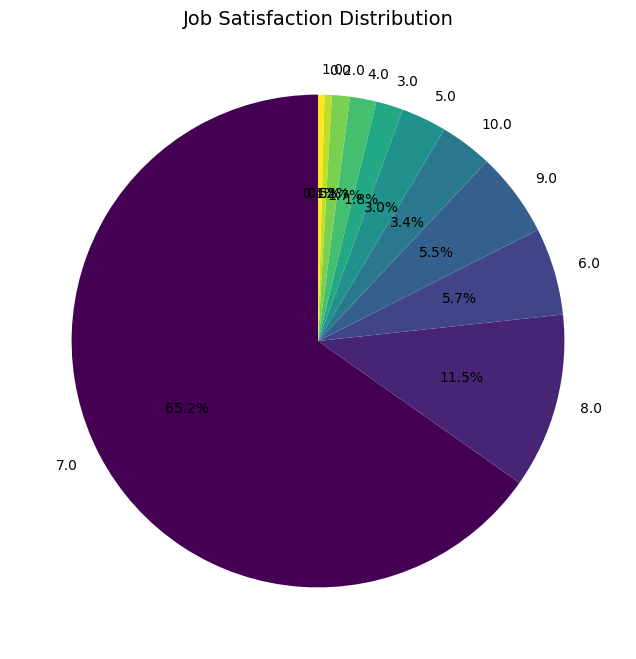

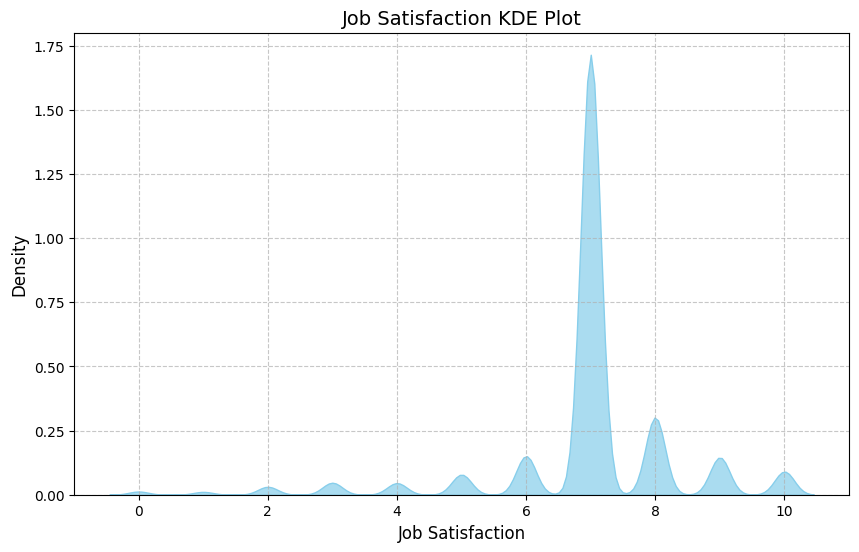

In [7]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Step 5: Visualize Job Satisfaction (Focus on JobSat)

# Check if 'JobSat' column exists and has data
if 'JobSat' in df.columns and not df['JobSat'].isnull().all():
    # Count the occurrences of each JobSat value
    job_sat_counts = df['JobSat'].value_counts()

    # Create a pie chart to visualize the distribution
    plt.figure(figsize=(8, 8))
    job_sat_counts.plot.pie(autopct='%1.1f%%', startangle=90, colormap='viridis')
    plt.title('Job Satisfaction Distribution', fontsize=14)
    plt.ylabel('')  # Remove y-axis label for clarity
    plt.show()

    # Optional: KDE plot for numerical JobSat (if applicable)
    if pd.api.types.is_numeric_dtype(df['JobSat']):
        plt.figure(figsize=(10, 6))
        sns.kdeplot(df['JobSat'].dropna(), fill=True, color='skyblue', alpha=0.7)
        plt.title('Job Satisfaction KDE Plot', fontsize=14)
        plt.xlabel('Job Satisfaction', fontsize=12)
        plt.ylabel('Density', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.show()

else:
    print("The 'JobSat' column is missing or does not contain valid data.")

Explanation:
Pie Chart:
Displays the proportion of different job satisfaction responses.
KDE Plot (Optional):
If JobSat is numeric, it plots a Kernel Density Estimate to visualize the distribution.
Validation:
Ensures the JobSat column exists and is not empty.
Interpretation:
Use the pie chart to identify the dominant job satisfaction categories.
If the KDE plot is used, examine the distribution's shape to understand satisfaction trends.
Run this code in your environment to generate visualizations. Let me know if you have any further questions! 

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


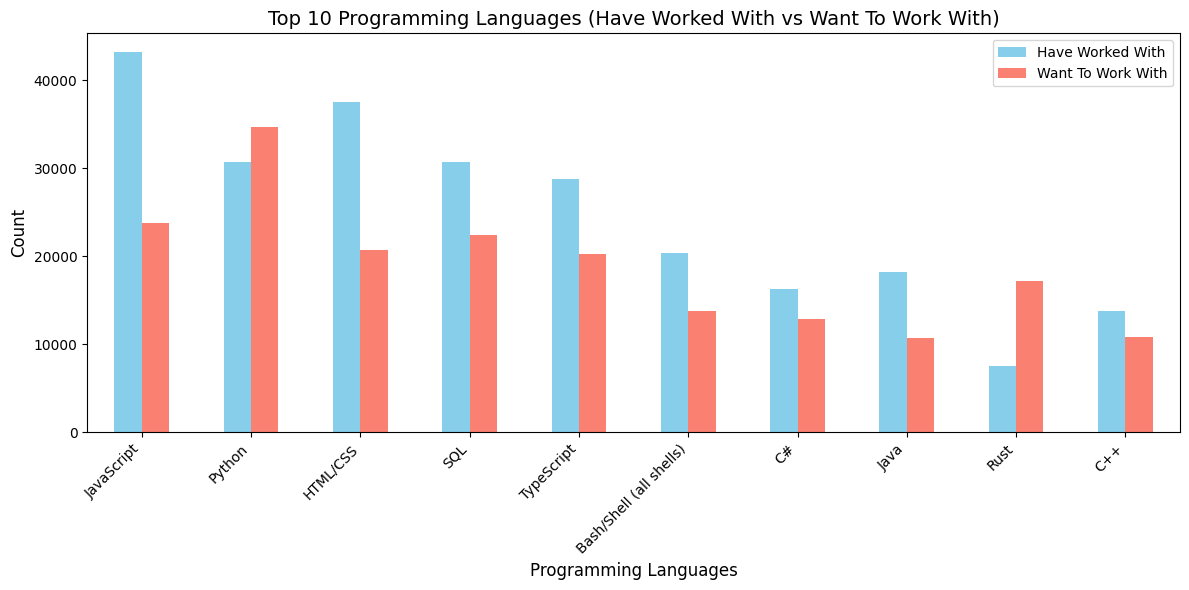

In [13]:
## Write your code here
import matplotlib.pyplot as plt
import pandas as pd

# Step 6: Programming Languages Analysis

# Split and explode the 'LanguageHaveWorkedWith' and 'LanguageWantToWorkWith' columns
have_worked = df['LanguageHaveWorkedWith'].dropna().str.split(';').explode()
want_to_work = df['LanguageWantToWorkWith'].dropna().str.split(';').explode()

# Get unique sets of languages for each column
languages_have_worked = set(have_worked)
languages_want_to_work = set(want_to_work)

# Optionally: Grouped bar chart for the top languages
# Count the frequencies for each category
have_worked_counts = have_worked.value_counts()
want_to_work_counts = want_to_work.value_counts()

# Combine the counts into a single DataFrame for comparison
combined_counts = pd.DataFrame({
    'Have Worked With': have_worked_counts,
    'Want To Work With': want_to_work_counts
}).fillna(0).astype(int)

# Sort by the sum of both columns to get the most popular languages
combined_counts['Total'] = combined_counts.sum(axis=1)
combined_counts = combined_counts.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plot the grouped bar chart
combined_counts.head(10).plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Top 10 Programming Languages (Have Worked With vs Want To Work With)', fontsize=14)
plt.xlabel('Programming Languages', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


Remote Work Trends by Region:

RemoteWork   Hybrid (some remote, some in-person)  In-person  Remote
Country                                                             
Afghanistan                                    33         13      10
Albania                                        25         10      14
Algeria                                        47          8      22
Andorra                                         6          5       4
Angola                                          9          6       5


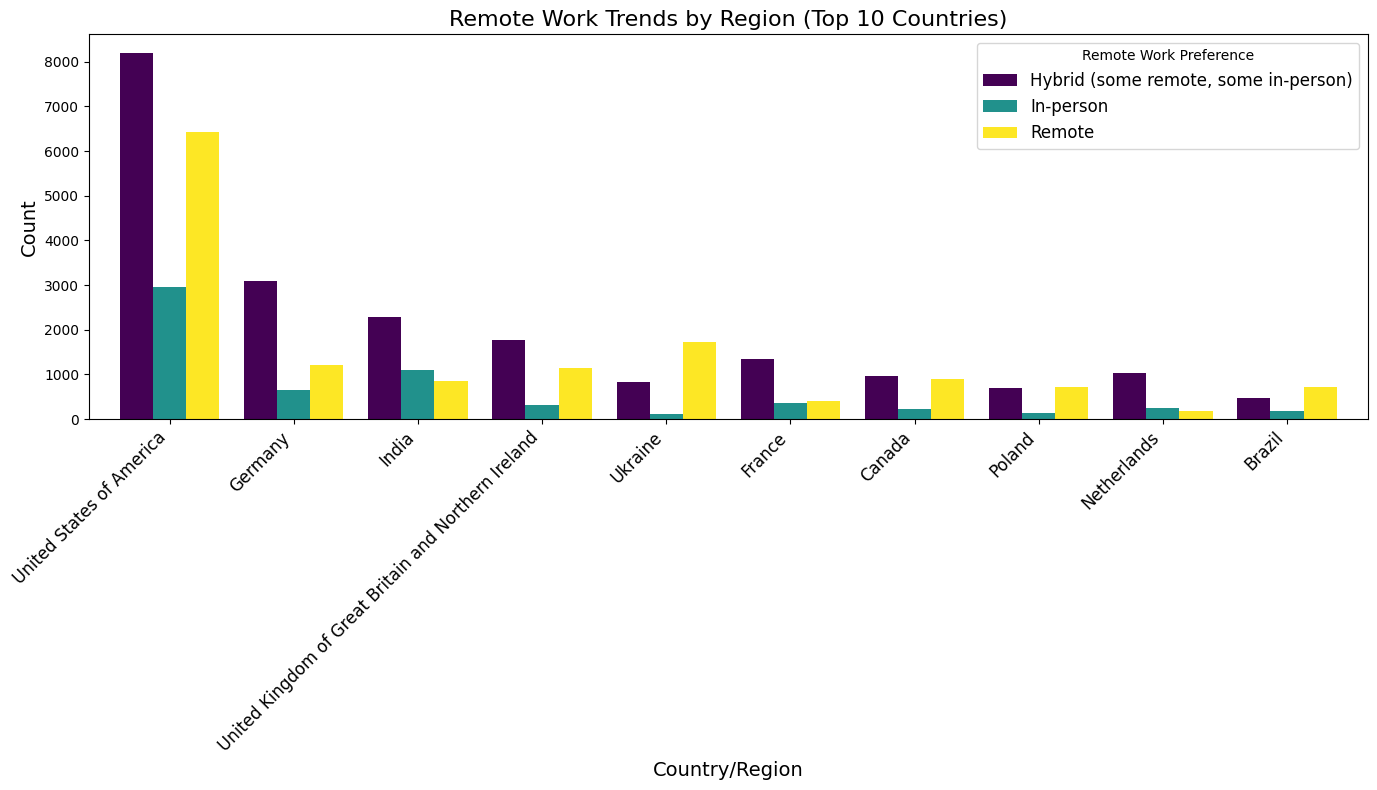

In [15]:
## Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Step 7: Analyze Remote Work Trends

# Group the data by region (Country) and RemoteWork to count occurrences
remote_work_trends = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

# Display the first few rows of the grouped data
print("Remote Work Trends by Region:\n")
print(remote_work_trends.head())

# Group the data by region (Country) and RemoteWork to count occurrences
remote_work_trends = df.groupby(['Country', 'RemoteWork']).size().unstack(fill_value=0)

# Filter for the top 10 countries with the most responses for clarity
top_countries = remote_work_trends.sum(axis=1).sort_values(ascending=False).head(10).index
filtered_trends = remote_work_trends.loc[top_countries]

# Create a grouped bar chart
filtered_trends.plot(kind='bar', figsize=(14, 8), stacked=False, width=0.8, colormap='viridis')
plt.title('Remote Work Trends by Region (Top 10 Countries)', fontsize=16)
plt.xlabel('Country/Region', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Remote Work Preference', fontsize=12)
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [16]:
## Write your code here
from scipy.stats import pearsonr, spearmanr

# Step 8: Correlation between Job Satisfaction and Experience

# Ensure 'JobSat' and 'YearsCodePro' are numeric
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values in these columns
correlation_data = df.dropna(subset=['JobSat', 'YearsCodePro'])

# Calculate the Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(correlation_data['JobSat'], correlation_data['YearsCodePro'])

# Calculate the Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(correlation_data['JobSat'], correlation_data['YearsCodePro'])

# Display the results
print("Correlation between Job Satisfaction and Years of Professional Coding Experience:")
print(f"Pearson Correlation: {pearson_corr:.2f} (p-value: {pearson_p_value:.2e})")
print(f"Spearman Correlation: {spearman_corr:.2f} (p-value: {spearman_p_value:.2e})")

Correlation between Job Satisfaction and Years of Professional Coding Experience:
Pearson Correlation: 0.07 (p-value: 3.30e-62)
Spearman Correlation: 0.11 (p-value: 4.59e-157)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


Cross-tabulation of Employment and Education Level:

EdLevel                                             Associate degree (A.A., A.S., etc.)  \
Employment                                                                                
Employed, full-time                                                                1059   
Employed, full-time;Employed, part-time                                               9   
Employed, full-time;Independent contractor, fre...                                  104   
Employed, full-time;Independent contractor, fre...                                   11   
Employed, full-time;Independent contractor, fre...                                    0   
...                                                                                 ...   
Student, full-time;Student, part-time;Employed,...                                    0   
Student, full-time;Student, part-time;Retired                                         0   
Student, part-time                   

/tmp/ipykernel_873/1482440614.py:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


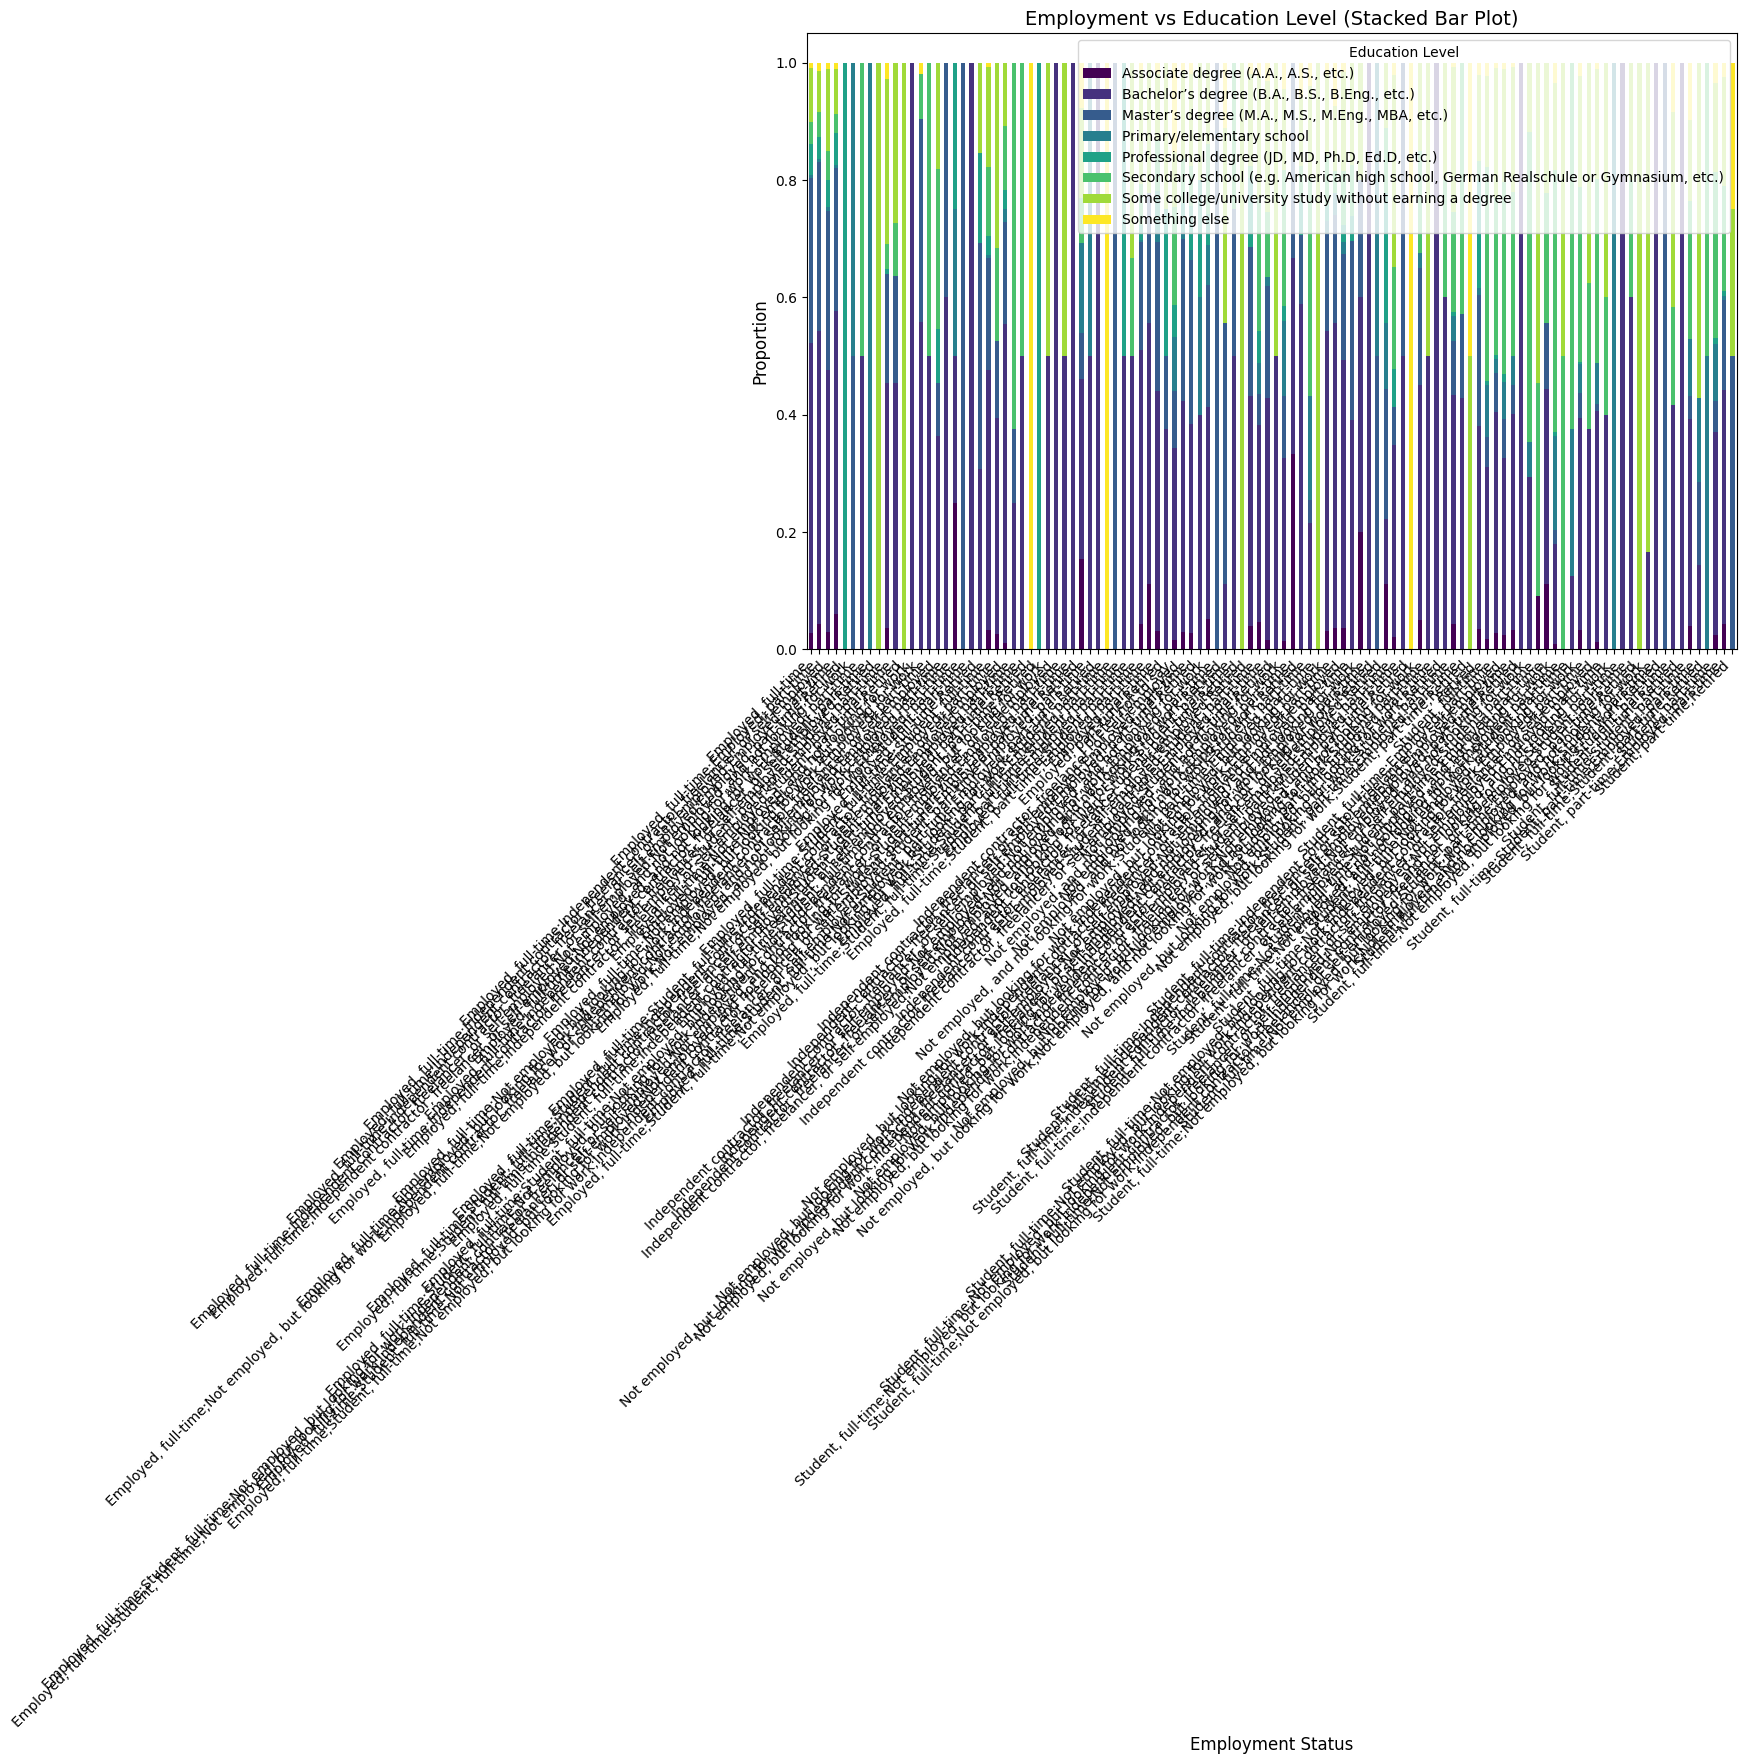

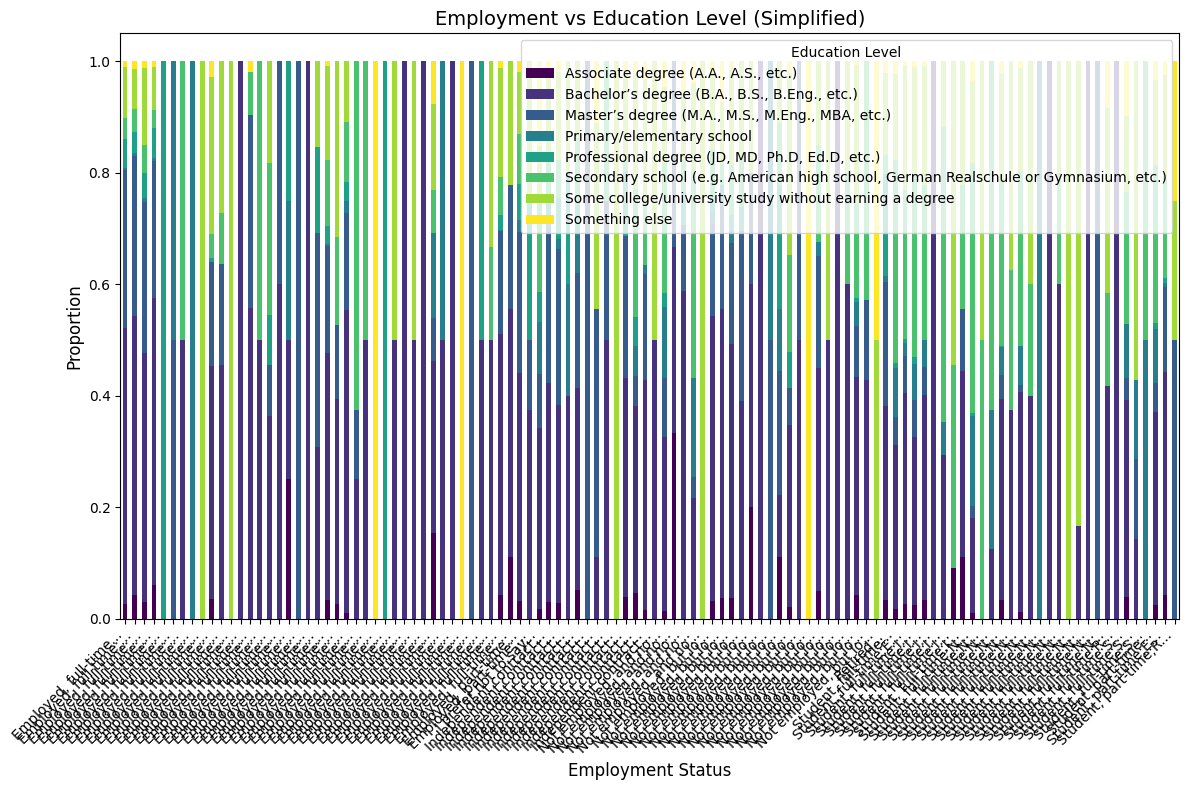

In [18]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt

# Step 9: Cross-tabulation Analysis (Employment vs. Education Level)

# Create a cross-tabulation of Employment and EdLevel
employment_education_crosstab = pd.crosstab(df['Employment'], df['EdLevel'])

# Display the cross-tabulation
print("Cross-tabulation of Employment and Education Level:\n")
print(employment_education_crosstab)

# Normalize by row to calculate percentages (optional)
employment_education_percentage = employment_education_crosstab.div(employment_education_crosstab.sum(axis=1), axis=0)

# Visualize the relationship using a stacked bar plot
employment_education_percentage.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Employment vs Education Level (Stacked Bar Plot)', fontsize=14)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Education Level', fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

# Simplify x-axis labels by truncating or abbreviating long entries
simplified_employment_education = employment_education_percentage.copy()

# Truncate long Employment labels for clarity
simplified_employment_education.index = simplified_employment_education.index.str.slice(0, 20) + '...'  # Limit to 20 characters

# Plot the simplified stacked bar chart
simplified_employment_education.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Employment vs Education Level (Simplified)', fontsize=14)
plt.xlabel('Employment Status', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(title='Education Level', fontsize=10, loc='upper right')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here
# Define the output file name
output_file = "cleaned_dataset.csv"

# Save the cleaned dataset to a CSV file
df.to_csv(output_file, index=False)

print(f"Cleaned dataset has been saved as '{output_file}'.")

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
